# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [34]:
## All work was done by referencing ! git clone https://github.com/ds3001f25/wrangling.git

## Question 1
import pandas as pd
df = pd.read_csv("/airbnb_hw.csv")
display(df.head()) # Visually inspect the dataframe
display(df.tail())
print("df.dtypes:") # Check what type of variable Price is being stored as
print(df.dtypes, '\n') # Object is a bad sign, continue investigaton
print('Before coercion: \n', df["Price"].describe(),'\n') # Price is being stored as an object (string) instead of a float (numeric), this is bad, we need to fix it.
# We need to convert Price from a string into numeric values.
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') # Done
# Now I want to count how many null (missing) values Price contains.
df['Price_nan'] = df['Price'].isnull()
df["Price"].isnull().sum()
# There are 181 missing values. This is because there are commas in the numbers within the "Price" variable once they pass 999 in value, so the unknown object ',' is being read as an invalid text when I forced coersion earlier. Therefore, it is being read as a NaN value.
# In order to fully clean the Price column, I would probably need to strip the commas and then convert to numeric.

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
30473,43022976,8/31/2015,10 Mins to Time Square/two floors,Queens,Apartment,NaN,Entire home/apt,11101.0,5.0,1,0,300,NaN
30474,42993382,8/31/2015,"1BR ocean view & F,Q train st",Brooklyn,Apartment,NaN,Private room,11224.0,2.0,1,0,125,NaN
30475,43033067,8/31/2015,Amazing Private Room,Brooklyn,Other,NaN,Private room,11206.0,1.0,1,0,80,NaN
30476,43000991,8/31/2015,Charming private female room: UWS,Manhattan,Apartment,NaN,Private room,10025.0,1.0,1,0,35,NaN
30477,42999189,8/31/2015,Huge Beautiful Bedroom - Astoria,Queens,House,NaN,Private room,11105.0,1.0,1,0,80,NaN


df.dtypes:
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

Before coercion: 
 count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object 



np.int64(181)

In [35]:
# Question 2
df = pd.read_csv("/mn_police_use_of_force.csv")
display(df.head()) # Visually inspect the dataframe
display(df.tail())
# I want to check how dirty the variable is by using unique function
print(df["subject_injury"].unique())
print(df["subject_injury"].value_counts(dropna=False)) # Only 3,077 rows have data: i.e. "Yes" or "No"
# Find the proportion
100 - (3077/len(df))*100 # Approximately 76% of the data is missing! Yes, this is a big concern.
# Cross Tabulate with force_type
pd.crosstab(df['subject_injury'], df['force_type'])
# Yes there are patterns. Bodily force has the highest amount of reports as compared to other types of force, like firearms for example which only contains 2 reports total. This could mean the dataset is unreliable since some force types could be under or miss reported.

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
12920,2021/08/30 21:38:46,Assault in Progress,Yes,ASLT5,NaN,Bodily Force,Joint Lock,White,Female,69.0,NaN,1,Loring Park
12921,2021/08/30 22:32:22,Unwanted Person,Yes,CIC,NaN,Bodily Force,Joint Lock,NaN,NaN,NaN,NaN,1,Cedar Riverside
12922,2021/08/31 12:03:08,Overdose w/All,Yes,FORCE,NaN,Bodily Force,Body Weight Pin,Black,Male,NaN,NaN,3,Seward
12923,2021/08/31 12:52:52,Attempt Pick-Up,No,WT,NaN,Bodily Force,Body Weight Pin,Black,Male,31.0,NaN,4,Camden Industrial
12924,2021/08/31 21:34:29,Unwanted Person,No,FORCE,NaN,Bodily Force,Push Away,White,Male,NaN,X,1,North Loop


[nan 'No' 'Yes']
subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


In [59]:
# Question 3
import pandas as pd
df = pd.read_parquet("/justice_data.parquet")
display(df.head())
# I want to check how dirty the variable is by using unique function
print(df["WhetherDefendantWasReleasedPretrial"].unique())
print(df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False), '\n') # This shows the dummy variables; 1 = yes defendant was released; 2 shows no; 9 seems to be a placeholder which should be read as NaN instead.
df["WhetherDefendantWasReleasedPretrial"] = df["WhetherDefendantWasReleasedPretrial"].replace(9,np.nan) # Use the replace function to get rid of 9 and replace with missing value instead. This tidys the data.
print(df["WhetherDefendantWasReleasedPretrial"].value_counts(dropna=False), '\n') # Check that there are now 31 missing values instead of 31 "9" values. It looks good.
# Before cleaning, variable was coded as 0, 1, and 9; it now is 0, 1, and NaN.

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64 

WhetherDefendantWasReleasedPretrial
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64 



In [69]:
# Question 4
import pandas as pd
df = pd.read_parquet("/justice_data.parquet")
# I need to clean the variable ImposedSentenceAllChargeInContactEvent by looking at the SentenceTypeAllChargesAtConvictionInContactEvent variable
print(df[["ImposedSentenceAllChargeInContactEvent", "SentenceTypeAllChargesAtConvictionInContactEvent"]].head())
df["ImposedSentenceAllChargeInContactEvent"] = df["ImposedSentenceAllChargeInContactEvent"].replace(["", " "], np.nan) # First I want to make sure the blanks are converted to NaN.
df["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(df["ImposedSentenceAllChargeInContactEvent"], errors="coerce") # Next i want to convert to numeric so the data is properly recognized.
# Now I am going to cross tabulate so I can compare ImposedSentenceAllChargeInContactEvent to SentenceTypeAllChargesAtConvictionInContactEvent
ct = pd.crosstab(df["SentenceTypeAllChargesAtConvictionInContactEvent"],df["ImposedSentenceAllChargeInContactEvent"].isnull())
print(ct) # For sentence types 4 and 9, missing values are expected, not random. This shows case when no sentence was expoected. We should not treat the missing values as a data problem.

  ImposedSentenceAllChargeInContactEvent  \
0                                          
1                                     60   
2                                     12   
3                       .985626283367556   
4                                          

   SentenceTypeAllChargesAtConvictionInContactEvent  
0                                                 9  
1                                                 0  
2                                                 1  
3                                                 1  
4                                                 4  
ImposedSentenceAllChargeInContactEvent            False  True 
SentenceTypeAllChargesAtConvictionInContactEvent              
0                                                  8720      0
1                                                  4299      0
2                                                   914      0
4                                                     0   8779
9                                

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

Before coercion:
 count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 

After coercion:
 count    7040.000000
mean     1935.621449
std       271.221061
min         0.000000
25%      1948.000000
50%      1986.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64 



,count
Year,
1940.0,24
1941.0,27
1942.0,41
1943.0,28
1944.0,31


,count
Year,
2022.0,98
2023.0,109
2024.0,52
2025.0,48
2026.0,1


Before numeric coercion:
 count     1841
unique     158
top         15
freq        80
Name: Age, dtype: object 

After numeric coercion:
 count    1716.000000
mean       28.664918
std        14.844192
min         3.000000
25%        17.000000
50%        25.000000
75%        38.000000
max        87.000000
Name: Age, dtype: float64 



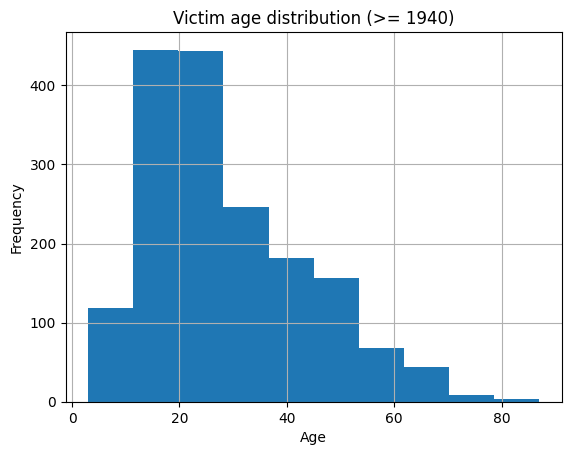

Sex
M          4333
F           720
UNKNOWN     454
Name: count, dtype: int64
Proportion male (all rows): 0.7868167786453605
Proportion male (among known sex): 0.8575103898674055
Type
Unprovoked    4097
Unknown        892
Provoked       518
Name: count, dtype: int64
Proportion unprovoked (all rows): 0.7439622298892319
Fatal Y/N
N          4221
Y           824
UNKNOWN     462
Name: count, dtype: int64
Type     Provoked  Unknown  Unprovoked
Sex                                   
F              28       79         613
M             446      545        3342
UNKNOWN        44      268         142
Type     Provoked   Unknown  Unprovoked
Sex                                    
F        0.054054  0.088565    0.149622
M        0.861004  0.610987    0.815719
UNKNOWN  0.084942  0.300448    0.034660
Fatal Y/N      N  UNKNOWN    Y
Type                          
Provoked     497        9   12
Unknown      368      400  124
Unprovoked  3356       53  688
Fatal Y/N          N   UNKNOWN         Y
Type 

In [9]:
## I used the wrangling guide in the ds3001 github for my syntax and decisions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("GSAF5.xls") # Step 1
df = df.replace(r"^\s*$", np.nan) # Step 2
df = df.dropna(axis=1, how="all") # Step 2
df.shape # check to make sure observations and parameters are correct
# Clean the year variable
var = "Year"
print("Before coercion:\n", df[var].describe(), "\n")
df[var] = pd.to_numeric(df[var], errors="coerce") # Convert the variable to numeric
print("After coercion:\n", df[var].describe(), "\n") # Values range from "Before 1903" to up to 2026.
df_40 = df[df["Year"] >= 1940].copy() # Filter the rows to focus on attacks since 1940
year_counts = df_40["Year"].value_counts().sort_index()
display(year_counts.head(), year_counts.tail()) # Attacks are generally increasing overtime with the exception of 2026 which has one entry (probably an error)
# Clean the age variable
var = "Age"
# Standardize and make tidy by replacing common issues
df_40[var] = df_40[var].str.replace("years", "") # Mostly years needs to be standardized, the jargon was completley different for different observations, need it all to be tidy.
df_40[var] = df_40[var].str.replace("year", "")
df_40[var] = df_40[var].str.replace("yrs", "")
df_40[var] = df_40[var].str.replace("yr", "")
df_40[var] = df_40[var].str.replace("teen", "15") # Using the midpoint 15
df_40[var] = df_40[var].str.replace("months", "0")
df_40[var] = df_40[var].str.replace("month", "0")
df_40[var] = df_40[var].str.replace("not stated", "")
df_40[var] = df_40[var].str.replace("unknown", "")
df_40[var] = df_40[var].str.replace(" n/a", "")
df_40[var] = df_40[var].str.replace("n/a", "")
df_40[var] = df_40[var].str.replace("or", " ")
df_40[var] = df_40[var].str.replace("-", " ")

print("Before numeric coercion:\n", df_40[var].describe(), "\n")
df_40[var] = pd.to_numeric(df_40[var], errors="coerce")
print("After numeric coercion:\n", df_40[var].describe(), "\n")

# Histogram of ages of victims
df_40[var].hist()
plt.title("Victim age distribution (>= 1940)")
plt.xlabel("Age"); plt.ylabel("Frequency")
plt.show()

# Proportion of shark attacks on males
var = "Sex"
df_40[var] = df_40[var].astype(str).str.strip().str.upper()
df_40[var] = df_40[var].str.replace("MALE", "M")
df_40[var] = df_40[var].str.replace("FEMALE", "F")
df_40[var] = df_40[var].str.replace("NOT STATED", "UNKNOWN")
df_40[var] = df_40[var].str.replace("NAN", "UNKNOWN")

# I needed to tidy anything not M/F to Unknown
df_40.loc[~df_40[var].isin(["M","F"]), var] = "UNKNOWN"
print(df_40[var].value_counts(dropna=False))

prop_male_all = (df_40[var] == "M").mean()
prop_male_known = (df_40.loc[df_40[var] != "UNKNOWN", var] == "M").mean()
print(f"Proportion male (all rows): {prop_male_all}") # Proportion of males of all attacks is ~79%
print(f"Proportion male (among known sex): {prop_male_known}") # proportion of males of all known attacks is even higher at 86%

# Clean the type variable
var = "Type"

# Keep only the two below; everything else make Unknown
keep = ["Unprovoked", "Provoked"]
df_40.loc[~df_40[var].isin(keep), var] = "Unknown"

print(df_40[var].value_counts(dropna=False))
prop_unprovoked = (df_40[var] == "Unprovoked").mean()
print(f"Proportion unprovoked (all rows): {prop_unprovoked}") # approximately 74% are unprovoked

# Clean the fatal variable
fatal_col = [c for c in df_40.columns if c.lower().startswith("fatal")][0] # Used AI tools here to help me with my syntax and to understand; Needed help to create a column specifically for fatal attacks to make my cleaning easier
df_40[fatal_col] = df_40[fatal_col].astype(str).str.strip().str.upper() # Stripped all the white space and make all uppercase to tidy
df_40[fatal_col] = df_40[fatal_col].astype(str) # Ensure all observations are strings not numeric
df_40[fatal_col] = df_40[fatal_col].str.replace(" ", "")   # get rid of extra spaces
df_40[fatal_col] = df_40[fatal_col].str.replace("yes", "Y")
df_40[fatal_col] = df_40[fatal_col].str.replace("no", "N")
df_40.loc[~df_40[fatal_col].isin(["Y","N"]), fatal_col] = "UNKNOWN" # Make a list of just yes, no, and unknown

print(df_40[fatal_col].value_counts(dropna=False))  # Find how many are fatal by using counts function

tab_type_sex = pd.crosstab(df_40["Sex"], df_40["Type"])
print(tab_type_sex)
print(tab_type_sex / tab_type_sex.sum(axis=0)) # find the unprovoked proportions of attacks
# Men are more likely to be unprovokely attacked
tab_fatal_type = pd.crosstab(df_40["Type"], df_40[fatal_col])
print(tab_fatal_type)
print(tab_fatal_type.div(tab_fatal_type.sum(axis=1), axis=0))
# It is more likely for an unprovoked attack to be fatal
tab_fatal_sex = pd.crosstab(df_40["Sex"], df_40[fatal_col])
print(tab_fatal_sex)
print(tab_fatal_sex / tab_fatal_sex.sum(axis=0)) # It is more likely to be fatal for a man

# Shark type fatalities
species_col = [c for c in df_40.columns if c.lower().startswith("species")][0] # Copied my syntax from the fatal variable to do the same for shark type
species_split = df_40[species_col].astype(str).str.lower().str.split()

# I used AI tools to help me with this part to understand how to search for if there was a white shark type and if there is to make a list of all of them and accordingly find the proportions of attacks by this type of shark
is_white = species_split.apply(lambda words: "white" in words if isinstance(words, list) else False)

prop_white_all = is_white.mean() # Find the mean of white sharks in relation to all species (known and unknown)

# Check for among known species
has_species = ~(df_40[species_col].isnull()) & (df_40[species_col] != "nan")
prop_white_known = is_white[has_species].mean() # Find prop by utilizing mean of white sharks among all known species

print(f"Proportion white shark (all rows): {prop_white_all}")
print(f"Proportion white shark (among known species): {prop_white_known}") # Approximately 19% of the attacks were from white sharks